# Notebook Goal
- synthesize type differentiation methods into one place
- finalize separation (e.g., of type 4 sources)
- single-run/metric/plot methodology to split all types
- 'basis vectors'
- update table accordingly
- verify that using these methods, transition sources identified as such

# Plan ("order of operations")
- revisit stdev ratio --> separation of 

In [1]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sb
import scipy.stats as st
import wotan

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

cross = Table.read('sourcefiles.csv')
full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')

summ = pd.read_csv('summtab.csv')
alls = pd.read_csv('allsummtab.csv') #most updated table

cross['Part'] = 1
cross2 = Table.read('part2files.csv')
cross2 = join(cross2,full,keys='src_n')
cross2['Part'] = 2

In [2]:
mlist2 = ['OII I','OIII I','OIV I']
mlist1 = ['OII I','OIII I']

In [3]:
srcns = np.array(alls['src_n'])

In [4]:
def sf(name,dpi=150):
    plt.savefig(f'Figs/{name}.png',bbox_inches='tight',dpi=dpi)

In [5]:
def plot(s,calib=False,both=True):
    try:band = o.getIV(s,cross,both=both,stack=True,plot=True,mlist=mlist1,figsize=(4,3),calib=calib)
    except:band = o.getIV(s,cross2,both=both,stack=True,plot=True,mlist=mlist2,figsize=(4,3),calib=calib)

In [6]:
#note: would be more efficient to rewrite code to only loop through table once
type1 = o.gettype(alls,num='1')
type2 = o.gettype(alls,num='2')
type3 = o.gettype(alls,num='3')
type4 = o.gettype(alls,num='4')
type5 = o.gettype(alls,num='5')
type6 = o.gettype(alls,num='6')
type7 = o.gettype(alls,num='7')

In [7]:
#typet: transitioning sources
# typet = o.gettype(alls,num='+')
#save list of their type names
t_types = []
typet = []
for a in range(len(alls)):
    if '+' in str(alls.loc[a]['type']):
        typet.append(alls.loc[a]['src_n'])
        t_types.append(alls.loc[a]['type']) #e.g. '1+5'

In [8]:
len(typet)

15

### Fill in Calculations in allsummtab for Transitioning Sources
- basenum not calculated in the past

In [9]:
#calculation of basenum for transitioning sources -- commented out b/c only needed once
# tdiffs = []
# for t in typet:
#     try: iband, vband = o.getIV(t,cross,stack=True,plot=False,mlist=mlist1,figsize=(4,3))
#     except: iband, vband = o.getIV(t,cross2,stack=True,plot=False,mlist=mlist2,figsize=(4,3))
#     row = alls[alls['src_n']==t]
#     med = np.median(iband['I mag'])
#     maxm = np.max(iband['I mag'])
#     minm = np.min(iband['I mag'])
#     #difference between difference between max and med, min and med
#     diff = (maxm-med)-(med-minm)
#     tdiffs.append(diff)
#     #add values to alls table
#     row['base num'] = diff
#     alls[alls['src_n']==t] = row

In [10]:
#write out alls for use in future
# alls.to_csv('allsummtab.csv',index=False)

In [9]:
def fulltplot(x='stdev I',y='det stdev I',legend=True,tbool=[False]*7,between=False,tab=alls):
    if between and len(tbool)==7: tbool.append(False) #make sure tbool is right length 
    o.tplot(type1,tab,color=pink,marker='*',label='1',x=x,y=y,text=tbool[0])
    o.tplot(type2,tab,color='black',label='2',x=x,y=y,text=tbool[1])
    o.tplot(type3,tab,color='darkgreen',marker='x',label='3',x=x,y=y,text=tbool[2])
    o.tplot(type4,tab,color='navy',marker='+',label='4',x=x,y=y,text=tbool[3])
    o.tplot(type5,tab,marker='v',label='5',color='maroon',x=x,y=y,text=tbool[4])
    o.tplot(type6,tab,marker='3',label='6',color='grey',x=x,y=y,text=tbool[5])
    o.tplot(type7,tab,color='darkseagreen',marker='h',label='7',x=x,y=y,text=tbool[6])
    #if between, also plot transition sources
    if between: o.tplot(typet,tab,marker='P',label='transition',color='rebeccapurple',x=x,y=y,text=tbool[7])
    plt.ylabel(y,fontsize=14)
    plt.xlabel(x,fontsize=14)
    if legend: plt.legend()

In [10]:
# alls['stdev ratio'] = alls['det stdev I']/alls['stdev I']
# alls['IQR ratio'] = alls['det IQR']/alls['I IQR']

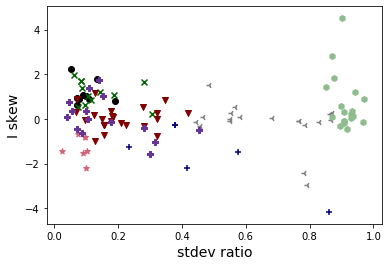

In [10]:
tbool = [False]*7
last = False
tbool.append(last)
fulltplot(x='stdev ratio',y='I skew',legend=False,tbool=tbool,between=True)

(0, 0.8)

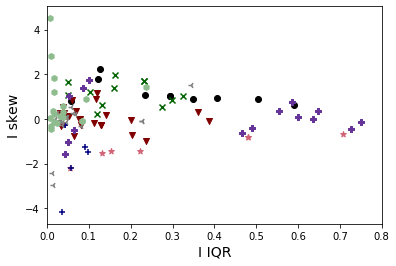

In [11]:
#curious about regular stdev (or IQR)
fulltplot(x='I IQR',y='I skew',legend=False,tbool=tbool,between=True)
plt.xlim(0,0.8)#cutting out outlier

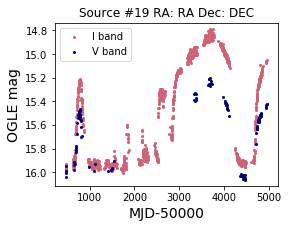

In [12]:
#properly identifies sources close to type 1, while still separate from type 1
plot(19) #was checking different plots based on numbering in plot above

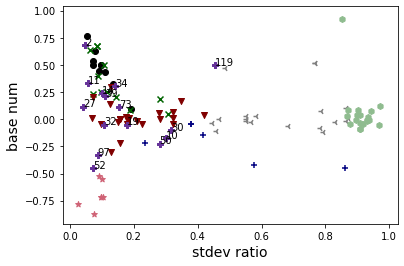

In [13]:
#best space previously: base num vs. stdev ratio
last = True #change for transition labels
tbool = [False]*7
tbool.append(last)
fulltplot(x='stdev ratio',y='base num',legend=False,tbool=tbool,between=True)
# sf('full_basenum_stdratio')

#### degeneracy in plot between neither faint nor bright base and *both* faint and bright base

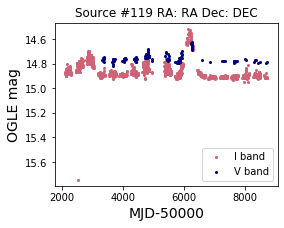

In [14]:
plot(119) #high outlier in plot above; TO DO: need outlier clean or percentage rather than max and min used in base num

## Checking and Updated Stdev Ratio
- low ratio likely due to use of trend for overall rather than original points
    - test this, and which better separates types

In [15]:
def comparevar(s,window=200,plot=True,retfrac=False,retIQR=False,original=False):
    row = alls[alls['src_n']==s]
    if float(row['calibration flag'])==1: calib=True
    else: calib=False
    try: iband, vband = o.getIV(s,cross,stack=True,plot=plot,mlist=mlist1,calib=calib)
    except: iband, vband = o.getIV(s,cross2,stack=True,plot=plot,mlist=mlist2,calib=calib)
    #spline detrend
    flatten,trend = o.splinedetrend(iband,window=window,retspline=True)
    mean = np.mean(iband['I mag'])
    detimag = iband['I mag'] - trend + mean
    detimag[np.abs(detimag-mean)>1] = mean
    if original: #overall stdev is of original points
        sp_std = np.nanstd(iband['I mag'])
    else: 
        #overall stdev is stdev of fitted spline
        sp_std = np.nanstd(trend)
    det_iqr = st.iqr(detimag,nan_policy='omit')
    det_std = np.nanstd(detimag)    

    if retfrac: return det_std/sp_std
    elif retIQR: return det_std,det_iqr
    else: return det_std

In [42]:
#already written out: fixing of detrended stdev 

# dets = []
# iqrs = []
# for s in srcns:
#     try: m,iq = comparevar(s,plot=False,retIQR=True)
#     except: m,iq = np.nan,np.nan
#     dets.append(m)
#     iqrs.append(iq)

empty file for OIII I
empty file for OII I
empty file for OIII I


In [51]:
# alls['stdev ratio'] = alls['det stdev I']/alls['stdev I']
# alls['IQR ratio'] = alls['det IQR']/alls['I IQR']

see resulting updated plot at end of notebook
- allsummtab updated, but allsumm (.numbers) and summtab not updated accordingly

# Working on Separation of Type 4
- problem: outbursts not always captured by detrending, so variable stdev ratio
- base num not as low as expected
- another variable that isolates them as having most points look like type 6, and then ~periodic outbursts

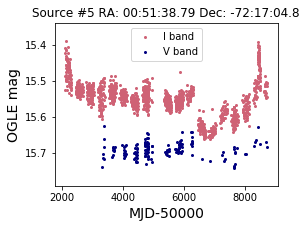

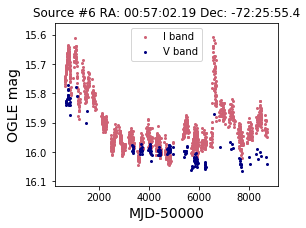

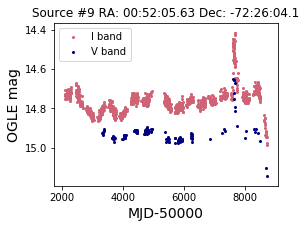

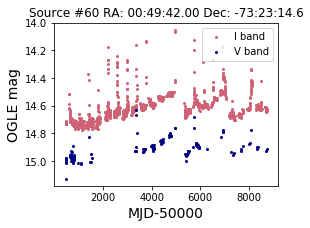

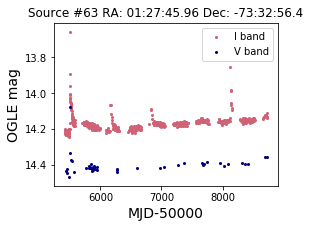

In [57]:
for t in type4:
    plot(t)

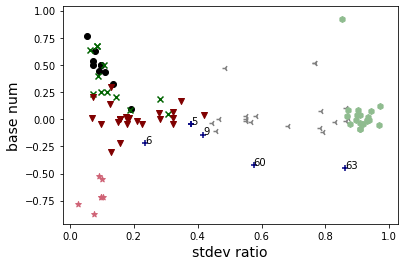

In [16]:
#understand where each is in plot
fulltplot(x='stdev ratio',y='base num',legend=False,tbool=[False,False,False,True,False,False,False])

luckily 60 and 63 are separate from others in parameter space
- true that 60 and 63 have lower variability and fainter bases
- seem to be (thinner) type 1 outbursts

empty file for OIII I


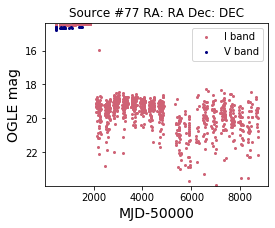

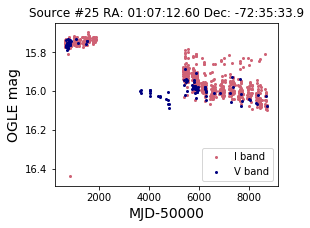

In [72]:
#weird type 6 outliers (in y-axis)
plot(77)
plot(25)

empty file for OII I


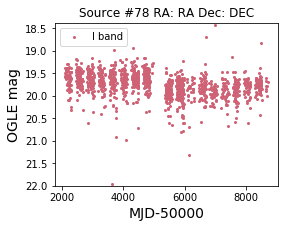

In [20]:
plot(78,both=False) #notice 78 is weird out of place outlier in plot above

list of tests to do for type 4
- similar to base num
    - compare min to min of some percentage of data to grad idea of lots of outliers
- method for more effective detrending? deals with 60 and 63 having falsely high ratios
- variable minimum among epochs (wouldn't work so well when more periodic)

In [21]:
#compare overall min to min of some percentage of data, to show that low percentage of data is much higher
mdiffs = []
for s in srcns:
    row = alls[alls['src_n']==s]
    if float(row['calibration flag'])==1: calib=True
    else: calib=False
    try:
        try: iband, vband = o.getIV(s,cross,stack=True,plot=False,mlist=mlist1,calib=calib)
        except: iband, vband = o.getIV(s,cross2,stack=True,plot=False,mlist=mlist2,calib=calib)
        #get overall minimum
        omin = np.min(iband['I mag'])
        #get min of set percentile
        pmin = np.max(iband['I mag']) - st.iqr(iband['I mag'],rng=[30,100])
        mdiffs.append(pmin-omin)
    except:
        mdiffs.append(np.nan)

empty file for OIII I
empty file for OII I
empty file for OIII I


In [22]:
#add to copy of alls and plot
acopy = alls.copy()
acopy['test 4'] = mdiffs
acopy['test 4 norm'] = (mdiffs/acopy['stdev I'])/acopy['I skew']

In [23]:
kurt = (acopy['I kurtosis'])/40
test = (acopy['test 4'])
std = (acopy['stdev I'])/np.max(acopy['stdev I'])
#to get rid of 1s,add base num (neg for 1s)
acopy['4 metric'] = kurt + test + std + acopy['base num']

(0, 1.5)

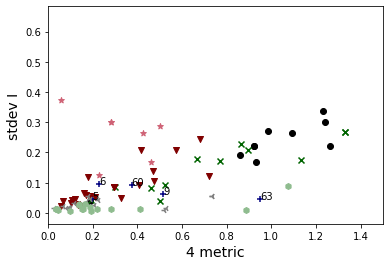

In [24]:
tbool = [False,False,False,True,False,False,False]
fulltplot(x='4 metric',y='stdev I',legend=False,tab=acopy,tbool=tbool)
plt.xlim(0,1.5)

(0, 1.5)

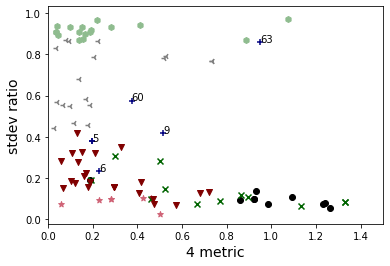

In [25]:
tbool = [False,False,False,True,False,False,False]
fulltplot(x='4 metric',y='stdev ratio',legend=False,tab=acopy,tbool=tbool)
# plt.ylim(0,0.6)
# plt.xlim(0,0.4)
plt.xlim(0,1.5)
# plt.ylim(0,1.5)

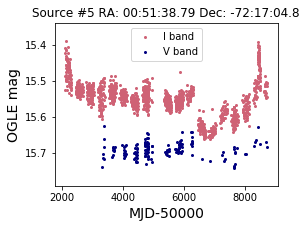

In [26]:
plot(5)

In [27]:
#attempt better version of detrending on these sources
sratios = []
for s in srcns:
    row = alls[alls['src_n']==s]
    if float(row['calibration flag'])==1: calib=True
    else: calib=False
    try:
        try: iband, vband = o.getIV(s,cross,stack=True,plot=False,mlist=mlist1,calib=calib)
        except: iband, vband = o.getIV(s,cross2,stack=True,plot=False,mlist=mlist2,calib=calib)
        flatten,trend = o.splinedetrend(iband,window=200,retspline=True)
        mean = np.mean(iband['I mag'])
        detimag = iband['I mag'] - trend + mean
        detimag[np.abs(detimag-mean)>2] = mean
        #set outliers at mean
        #irange = st.iqr(detimag,rng=[5,100]) #reset detrended outliers to mean
#         cut = np.max(detimag)-irange
#         detimag[detimag<cut] = mean
        sig = np.std(detimag) #try sigma clip instead
        med = np.median(detimag)
        detimag[detimag<med-2*sig] = mean
    #     plt.figure(figsize=(4,3))
    #     plt.scatter(iband['MJD-50000'],detimag,color=blue)
        #now get stdev ratio
        ostd = np.std(iband['I mag'])
        dstd = np.std(detimag)
        sratios.append(dstd/ostd)
    except: sratios.append(np.nan)

empty file for OIII I
empty file for OII I
empty file for OIII I


In [28]:
acopy['new ratio'] = sratios

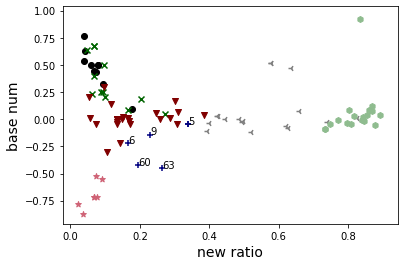

In [29]:
tbool = [False,False,False,True,False,False,False]
fulltplot(x='new ratio',y='base num',legend=False,tab=acopy,tbool=tbool)

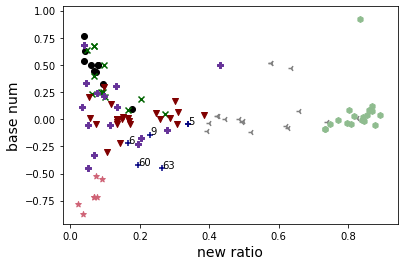

In [30]:
#shows how detrended ratio fixed
tbool = [False,False,False,True,False,False,False]
fulltplot(x='new ratio',y='base num',legend=False,tab=acopy,tbool=tbool,between=True)

In [31]:
#try out IQR/range to see outliers
acopy['IQR/range'] = acopy['I IQR']/acopy['I range']

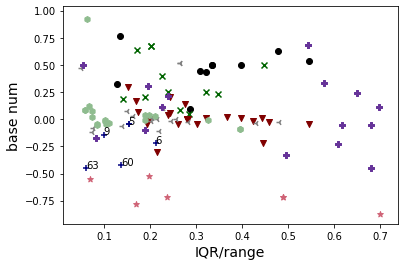

In [32]:
tbool = [False,False,False,True,False,False,False]
fulltplot(x='IQR/range',y='base num',legend=False,tab=acopy,tbool=tbool,between=True)

(-0.5, 1.25)

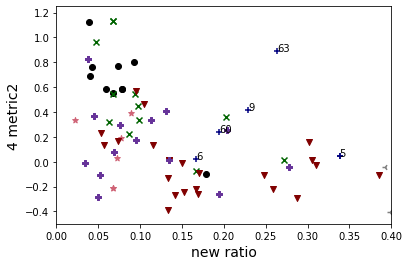

In [33]:
#add to metric -- metric still not working all that well
acopy['4 metric2'] = kurt + test + std + acopy['base num'] - acopy['IQR/range']
tbool = [False,False,False,True,False,False,False]
fulltplot(x='new ratio',y='4 metric2',legend=False,tab=acopy,tbool=tbool,between=True)
plt.xlim(0,0.4)
plt.ylim(-0.5,1.25)

new ratio doesn't change much whether 5% or sigma clip used

(0, 2)

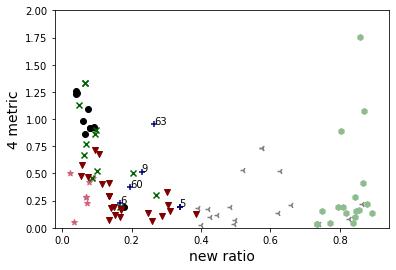

In [34]:
tbool = [False,False,False,True,False,False,False]
fulltplot(x='new ratio',y='4 metric',legend=False,tab=acopy,tbool=tbool)
plt.ylim(0,2)

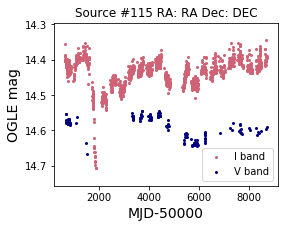

In [35]:
plot(115) #near type 4 since kurtosis independent of direction

(-5, 40)

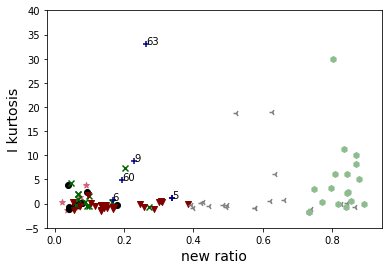

In [36]:
tbool = [False,False,False,True,False,False,False]
fulltplot(x='new ratio',y='I kurtosis',legend=False,tab=acopy,tbool=tbool)
plt.ylim(-5,40)

# Separation of Types 2 and 3, Assuming They're Separated from the Rest
- i.e. only run this code after a cut of basenum/use conditions within bigdip
- this code successfully calls types 1 and 4 "neither type 2 or 3"

Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3
Type 3


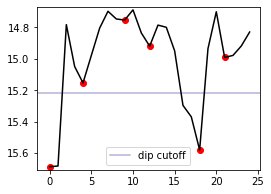

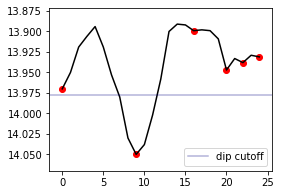

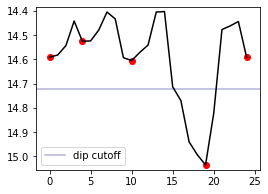

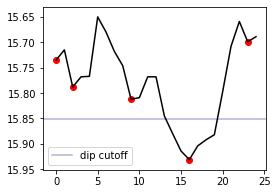

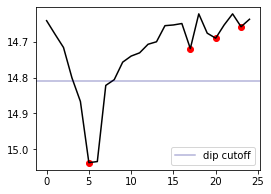

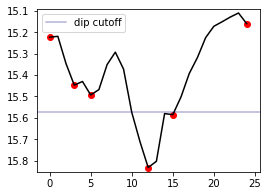

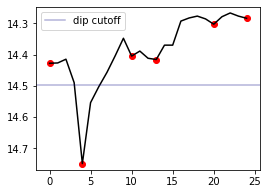

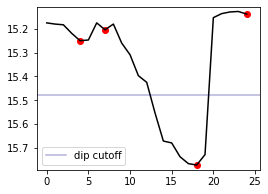

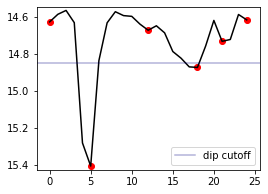

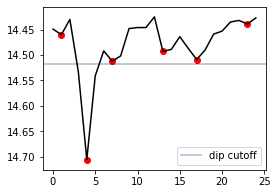

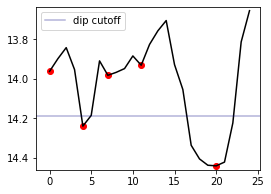

In [5]:
for t in type3:
    o.bigdip(t,cross,cross2,mlist1,mlist2,ncut=25,statistic='max',peaks=True,sig=1)

Type 2
Type 2
Type 2
Type 2
Type 2
Type 2
Type 2
Type 2
Type 2


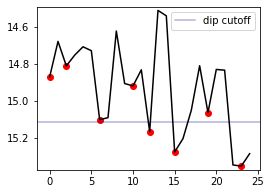

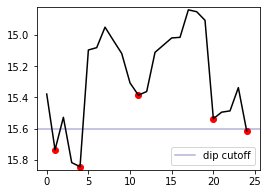

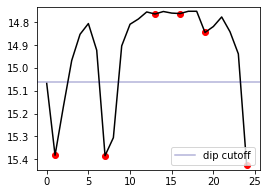

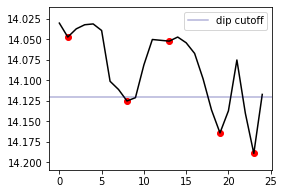

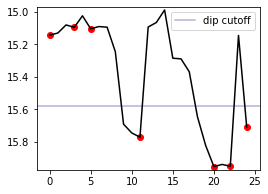

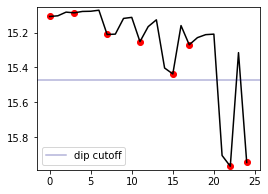

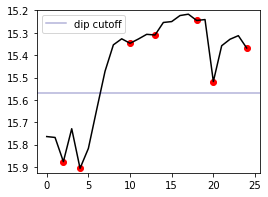

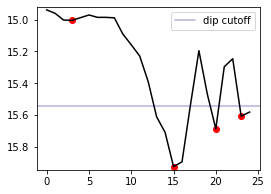

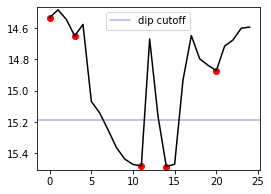

In [6]:
for t in type2:
    o.bigdip(t,cross,cross2,mlist1,mlist2,ncut=25,statistic='max',peaks=True,sig=1)

In [37]:
#stdev ratio doesn't do initial check but should repeat in case using the latter

#do cut from initial plot
dcut = alls[alls['base num']>0.05]
dcut = dcut[dcut['stdev ratio']<0.18] #or do 0.2
#try also cutting on skew
dcut = dcut[dcut['I skew']>0.5]

In [38]:
len(dcut)

22

In [39]:
dcut['type'] #only type 2, type 3, transition with 2 and 3, and 2 type 5s (which could maybe be reclassified)

0     3+5
1       3
5       2
11      2
14      3
15      2
20      3
21      3
29    3+5
32      3
34    2+6
36      3
40      2
51      3
56      5
65    2+5
71      2
76      2
77      2
85      2
92      5
97      3
Name: type, dtype: object

with the above cut, only a couple type 5s make it in
- transitions all have 2 or 3 in them

In [39]:
dtypes = np.array(dcut['type'])

In [40]:
dtypes

array(['3+5', '3', '2', '2', '3', '2', '3', '3', '3+5', '3', '2+6', '3',
       '2', '3', '5', '2+5', '2', '2', '2', '2', '5', '3'], dtype=object)

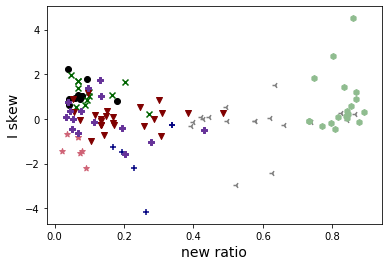

In [41]:
fulltplot(x='new ratio',y='I skew',legend=False,tab=acopy,between=True)

In [40]:
acopy['skew + base num'] = acopy['I skew'] + acopy['base num']

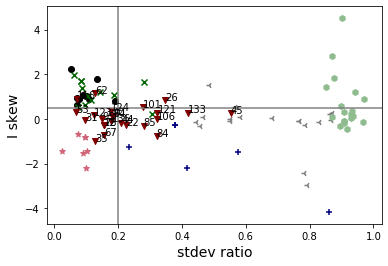

In [45]:
#trying out both versions of stdev ratio
tbool = [False,False,False,False,True,False,False]
fulltplot(x='stdev ratio',y='I skew',legend=False,tbool=tbool,tab=acopy,between=False)
# plt.xlim(0,0.2)
plt.axhline(0.5,color='grey')
plt.axvline(0.2,color='grey')

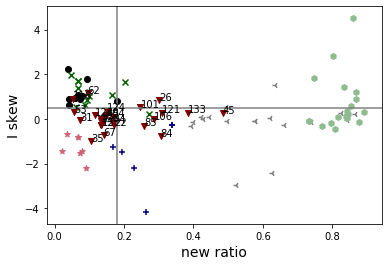

In [43]:
tbool = [False,False,False,False,True,False,False]
fulltplot(x='new ratio',y='I skew',legend=False,tbool=tbool,tab=acopy,between=False)
# plt.xlim(0,0.2)
plt.axhline(0.5,color='grey')
plt.axvline(0.18,color='grey')
#only 62 and 116 abvoe this cutoff

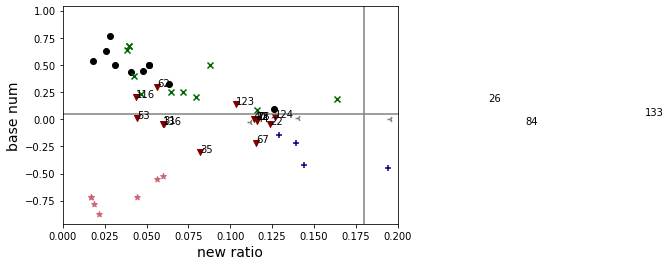

In [88]:
#find type 3 outlier (big dip): 21
#now find couple of type 5 outlers at high skew + base num
tbool = [False,False,False,False,True,False,False]
fulltplot(x='new ratio',y='base num',legend=False,tbool=tbool,tab=acopy,between=False)
plt.xlim(0,0.2)
plt.axhline(0.05,color='grey')
plt.axvline(0.18,color='grey')

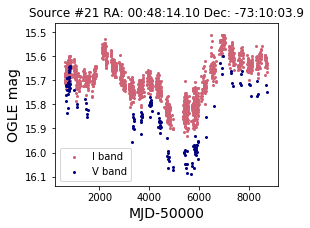

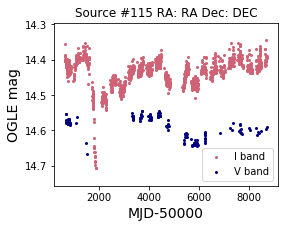

In [74]:
plot(21) #bluer when brighter; very well could be type 5 so fair to be in that region
plot(115) #not complete outlier but true that it looks more like a 6 with one sharp dip

123 a false outlier b/c of it's minimum outlier point
- gives it a higher base num than it should have
- should do outlier cleaning to address thi sone

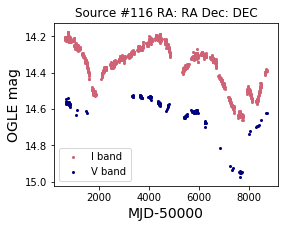

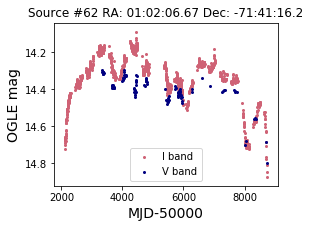

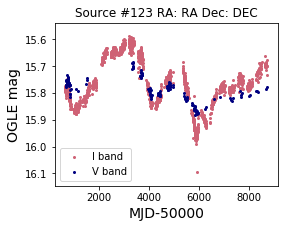

In [76]:
#62,123,116 classified as type 5 but in area of 2s and 3s using skew or base num
plot(116)
plot(62)
plot(123)

In [86]:
len(type2)+len(type3)#aiming for this value -1 in table, + 2 for type 5 sources

20

In [101]:
reload(o)
i = 0
for d in dcut['src_n']:
    print('by-eye:'+dtypes[i])
    o.bigdip(d,cross,cross2,mlist1,mlist2,ncut=25,statistic='max',peaks=True,sig=1,plot=False,plotlc=False,printtype=True)
    i+=1
#notice 123 looks like bigger dip than it is b/c of outlier min

by-eye:3+5
Type 3
by-eye:3
Type 3
by-eye:2
Type 2
by-eye:2
Type 2
by-eye:3
Type 3
by-eye:2
Type 2
by-eye:3
Type 3
by-eye:3
Type 3
by-eye:3+5
Type 3
by-eye:3
Type 3
by-eye:2+6
Type 2
by-eye:3
Type 3
by-eye:2
Type 2
by-eye:3
Type 3
by-eye:5
Type 3
by-eye:2+5
Type 2
by-eye:2
Type 2
by-eye:2
Type 2
by-eye:2
Type 2
by-eye:2
Type 2
by-eye:5
Type 3
by-eye:3
Type 3


- summary: probably just re-classify 21 (to type 5), 116, and 62
- do cut by skew and stdev ratio (and base num?) --> run through big dip code to further break down
- **what to do about "transition sources"? within this cut? qualitative?**

> comment on stdev ratio
> cutoff is 0.18 using 'new ratio' and 0.2 using 'stdev ratio'

# Separation of Types 5, 6, 7
- 5s are separate from 1-4 b/c they have base num ~0
- 5, 6, 7 essentially a progression along stdev ratio
    - think of 5 as having overall variability >double the local variability
- kurtosis also helpful in division of 6 and 7

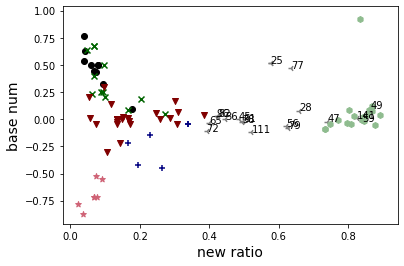

In [41]:
tbool = [False,False,False,False,False,True,False]
fulltplot(x='new ratio',y='base num',legend=False,tbool=tbool,tab=acopy,between=False)

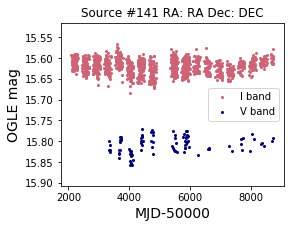

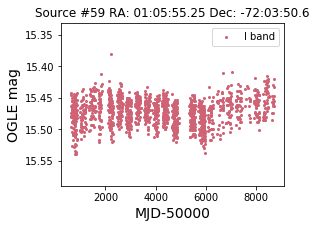

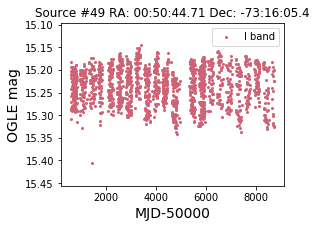

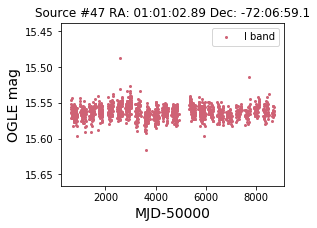

In [44]:
#check if outlier type 6s (in type 7 blob) correctly classified
plot(141,calib=True) #definitely a borderline case --> check periodicity below
#I believe this one has strong 5.18d pd, which could be NRP
#borderline cases
plot(59,calib=True,both=False)
plot(49,calib=True,both=False)
plot(47,calib=True,both=False) #could be cut off but would be very exact

changing the above 4 to type 7 

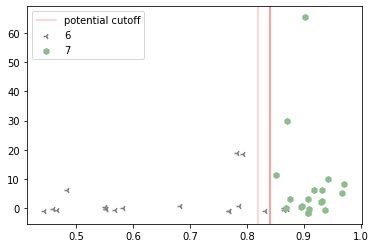

In [47]:
#now check kurtosis of potential false positives
x = 'stdev ratio'
y = 'I kurtosis'
o.tplot(type6,acopy,marker='3',label='6',color='grey',x=x,y=y,text=False)
o.tplot(type7,acopy,color='darkseagreen',marker='h',label='7',x=x,y=y,text=False)

# plt.xlim(0.85,1) #same three outliers
plt.axvline(0.82,color='red',alpha=0.2,label='potential cutoff') #keeps 47
plt.axvline(0.84,color='red',alpha=0.5)
#cutoffs if stdev ratio ultimately used
plt.legend()

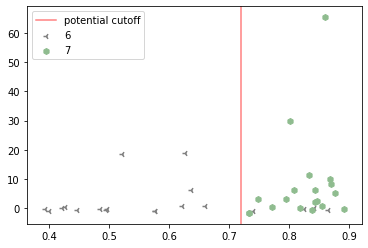

In [51]:
#again, after re-classification, perfectly divides
x = 'new ratio'
y = 'I kurtosis'
o.tplot(type6,acopy,marker='3',label='6',color='grey',x=x,y=y,text=False)
o.tplot(type7,acopy,color='darkseagreen',marker='h',label='7',x=x,y=y,text=False)

# plt.xlim(0.85,1) #same three outliers
plt.axvline(0.72,color='red',alpha=0.5,label='potential cutoff') #keeps 47
#cutoffs if stdev ratio ultimately used
plt.legend()

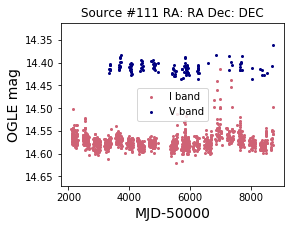

In [166]:
plot(111) #kurtosis outlier for type 6 (but not at super high ratio)

(0, 0.06)

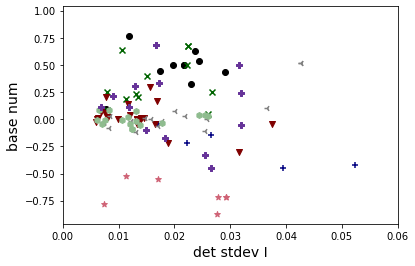

In [52]:
#slight distribution difference between types 2 and 3
tbool = [False,False,False,False,False,False,False]
fulltplot(x='det stdev I',y='base num',legend=False,tbool=tbool,tab=acopy,between=True)
plt.xlim(0,0.06)

#### now separating type 6s from 5 etc.
- unsure but moving 45 to type 6

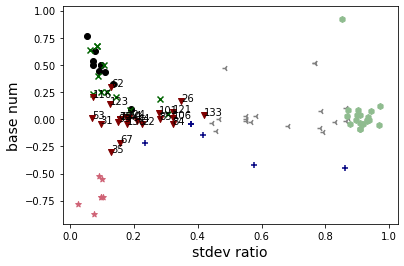

In [53]:
tbool = [False,False,False,False,True,False,False]
fulltplot(x='stdev ratio',y='base num',legend=False,tbool=tbool,tab=acopy,between=False)
# plt.xlim(0.2,0.4)

In [72]:
# for t in type6:
#     plot(t,both=False,calib=True)

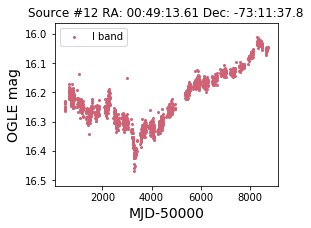

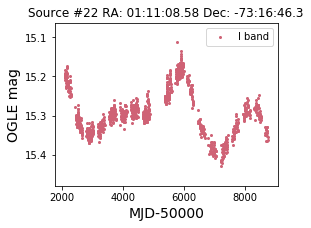

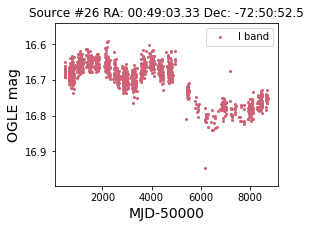

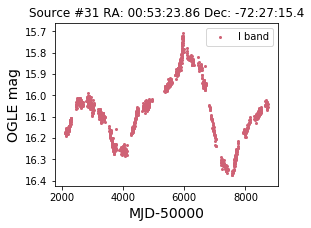

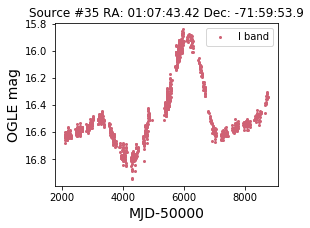

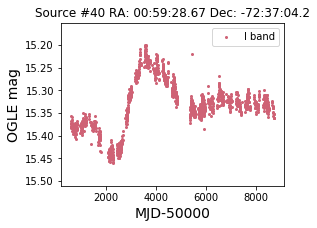

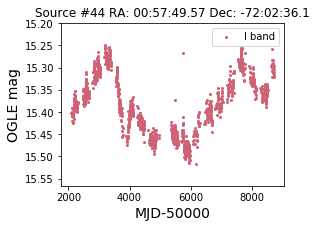

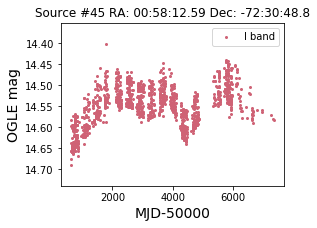

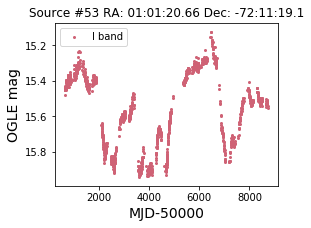

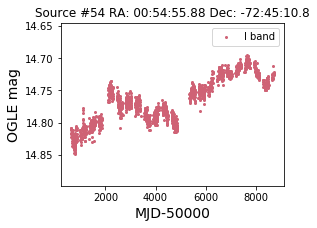

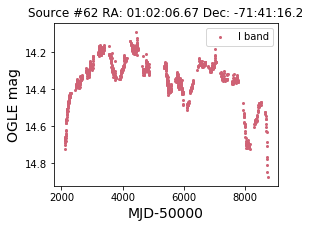

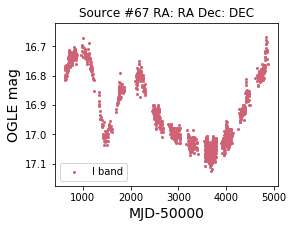

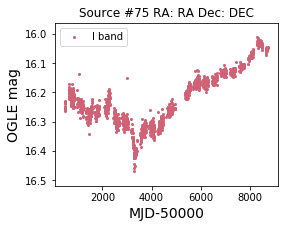

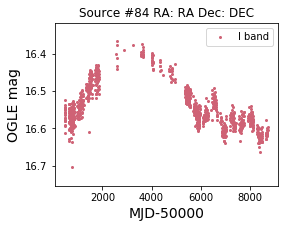

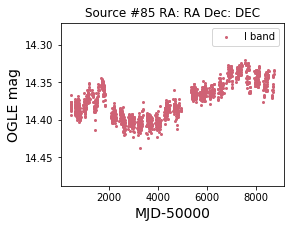

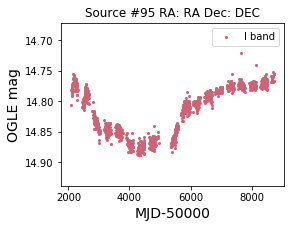

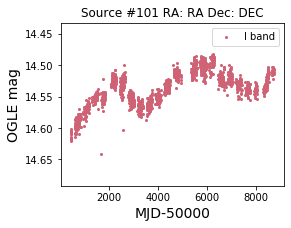

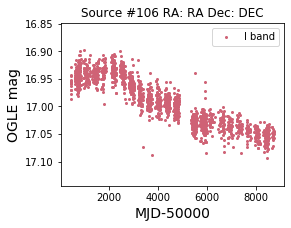

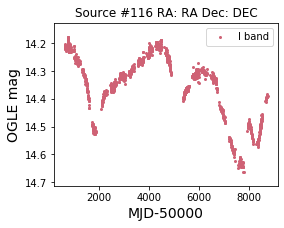

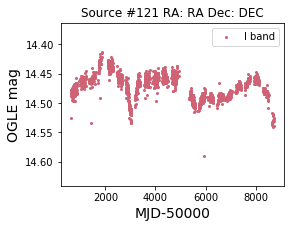

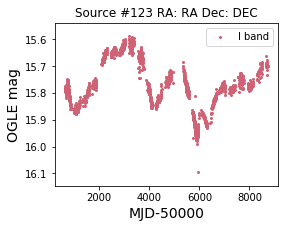

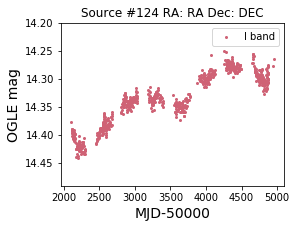

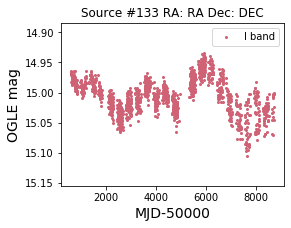

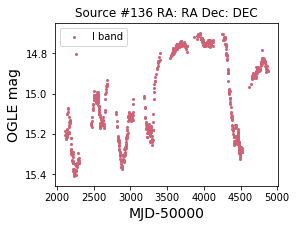

In [68]:
# for t in type5:
#     plot(t,both=False)

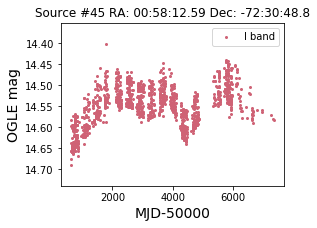

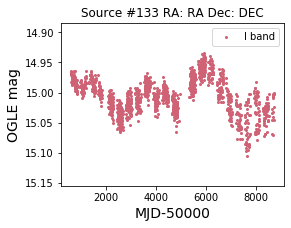

In [54]:
#type 5s near type 6s
plot(45,both=False) #reclassifying to type 6
plot(133,both=False) #could be cut off, just borderline

(-0.85, 0.8)

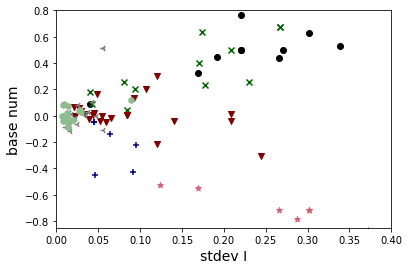

In [54]:
#decent plot to use for type 4
tbool = [False,False,False,False,False,False,False]
fulltplot(x='stdev I',y='base num',legend=False,tbool=tbool,tab=acopy,between=False)
plt.xlim(0,0.4) #cutting out untrustworthy outliers
plt.ylim(-.85,0.8)

In [208]:
# manually reclassified each of these so they will no longer come up as type 6
# plot(95,both=False)
# plot(54,both=False)#also should be type 5 not 6

In [55]:
# plot(101,both=False) #reclassified
# plot(85,both=False)#reclassified
# plot(106,both=False)#reclassified

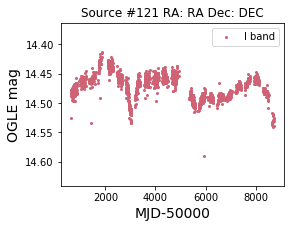

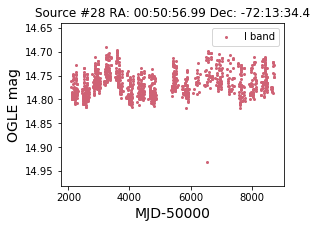

In [220]:
plot(121,both=False)
plot(28,both=False)

28 interesting source b/c ratio fairly low with new ratio, but much higher using old method (which wasn't as good for type 4 sources)

In [59]:
acopy['IV mean diff'] = acopy['mean I'] - acopy['mean V']
acopy['IV skew diff'] = acopy['I skew'] - acopy['V skew']
acopy['IV std diff'] = acopy['stdev I'] - acopy['stdev V']
acopy['IV kurt diff'] = acopy['I kurtosis'] - acopy['V kurtosis']
acopy['IV std ratio'] = acopy['stdev I']/acopy['stdev V']


(-0.5, 0.5)

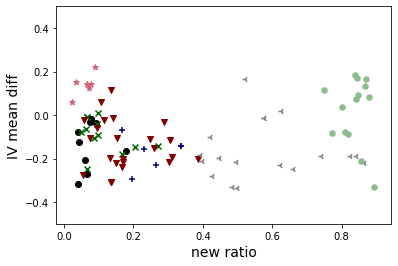

In [57]:
#separates type 1 decently
tbool = [False,False,False,False,False,False,False]
fulltplot(x='new ratio',y='IV mean diff',legend=False,tbool=tbool,tab=acopy,between=False)
plt.ylim(-.5,.5)

(-0.1, 0.25)

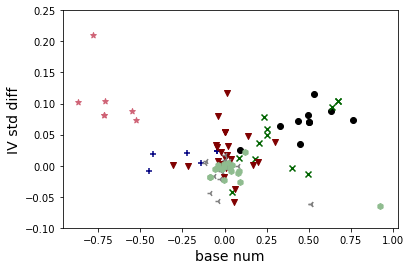

In [58]:
#skew and base num interesting as x-axis here
tbool = [False,False,False,False,False,False,False]
fulltplot(x='base num',y='IV std diff',legend=False,tbool=tbool,tab=acopy,between=False)
plt.ylim(-.1,0.25)

(-0.1, 5)

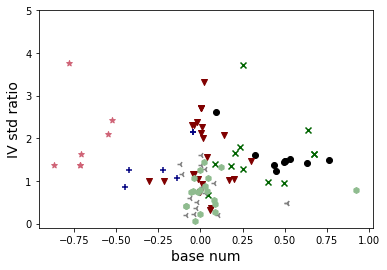

In [61]:
#ratio rather than difference
#skew and base num interesting as x-axis here
tbool = [False,False,False,False,False,False,False]
fulltplot(x='base num',y='IV std ratio',legend=False,tbool=tbool,tab=acopy,between=False)
plt.ylim(-.1,5)

# Plotting Types

# Writing Up this Notebook into Overleaf
- how much/best order to present qualitative and quantitative approach?

## Another Attempt at PCA

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def fullpca(tab,features,n=2,retdf=True,addpart=True):
    '''Standardize features and perform pca with n components'''
    #only keep rows where feature is not a nan
    df = tab[np.isnan(tab[features[0]])==False]
    #loop through remaining features
    for f in features[1:]:
        df = df[np.isnan(df[f])==False]
    print(len(df))
    x = df.loc[:, features]
    # Separating out the target
    y = df.loc[:,['src_n']]
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    #perform PCA with n components
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(x)
    columns = ['']*n
    for c in range(1,n+1):
        columns[c-1] = f'pc {c}'
    pdf = pd.DataFrame(data = principalComponents, columns = columns)
    #add part to pdf
    if addpart:
        part = np.array(df['Part'])
        pdf['Part'] = part
        pdf['src_n'] = df['src_n']
    print(f'explained variance by component:{pca.explained_variance_ratio_}')
    if retdf: return df,pdf
    else: return pdf

In [134]:
# acopy.columns

In [104]:
features = ['base num','I skew', 'IQR/range','stdev I','I range','I kurtosis','mean I','stdev ratio']#,'best auto det pd','spin period','I V-I slope']
df,pdf = fullpca(acopy,features,n=8)

107
explained variance by component:[0.31829125 0.2326475  0.18679251 0.11564788 0.06320766 0.04169678
 0.03237533 0.00934111]


(-3, 3)

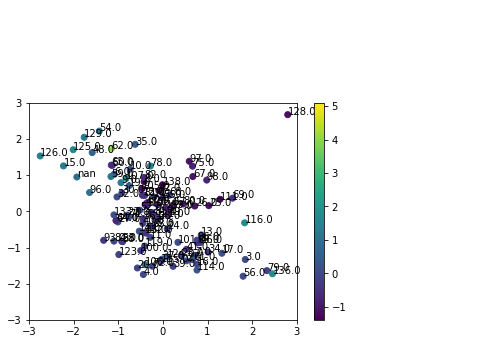

In [125]:
plt.scatter(pdf['pc 2'],pdf['pc 3'],c=pdf['pc 4'])
plt.colorbar()
for p in range(len(pdf)):
    plt.annotate(str(pdf.loc[p]['src_n']),xy=(pdf.loc[p]['pc 2'],pdf.loc[p]['pc 3']))
plt.xlim(-3,3)
plt.ylim(-3,3)

no clear grouping that I'd agree with